In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [1]:
#simple, white, league
from IPython.html.services.config import ConfigManager
from IPython.utils.path import locate_profile
cm = ConfigManager(profile_dir=locate_profile(get_ipython().profile))
cm.update('livereveal', {
              'theme': 'league',
              'transition': 'zoom',
              'start_slideshow_at': 'selected',
              'width': 1000,
              'height': 1024,
})

{u'height': 1024,
 u'start_slideshow_at': 'selected',
 u'theme': 'league',
 u'transition': 'zoom',
 u'width': 1000}

<img src="TU_LOGO.png" alt="TU Delft" width="30%" align="right" border="4"><br><br><br><br>
<h3 align="center">SLAMming with Spheros</h3>

<div style="text-align:center;"> Srinivas Kandasamy<div><br />

<div style="text-align:center;">Advisor: Dr. Tam&#225;s Keviczky<div><br/>
<div style="text-align:center;">Delft Center for Systems and Control<div>

## Introduction

"SLAM asks for a mobile robot, placed at an unknown location in an unknown environment, to build a consistent map of the environment while simultaneously determine its location within this map."

** Potential benefits and state-of-the-art SLAM**

- No need of maps or external position information
- Truly autonomous operation
- Decades of research - practical solution is possible

<h3 align="center">An impact-based approach to Simultaneous Localization and Mapping</h3> 

<img style="padding-left:125px;" src="./images/impact_slam.png" alt="Impact SLAM" width="80%" align="center">

### Illustration of SLAM
<img style="padding-left:50px;" src="./images/slam_example1.png" alt="Figure 1" width="60%" align="center">

### Measurement Step
<img style="padding-left:50px;" src="./images/slam_example2.png" alt="Figure 2" width="60%" align="center">

### Update Step
<img style="padding-left:50px;" src="./images/slam_example3.png" alt="Figure 3" width="60%" align="center">

### Prediction Step
<img style="padding-left:50px;" src="./images/slam_example4.png" alt="Figure 4" width="60%" align="center">

### Measurement Step
<img style="padding-left:50px;" src="./images/slam_example5.png" alt="Figure 5" width="60%" align="center">

### Update Step
<img style="padding-left:50px;" src="./images/slam_example6.png" alt="Figure 6" width="60%" align="center">

### Prediction Step
<img style="padding-left:50px;" src="./images/slam_example7.png" alt="Figure 7" width="60%" align="center">

### Measurement Step
<img style="padding-left:50px;" src="./images/slam_example8.png" alt="Figure 8" width="60%" align="center">

### Update Step
<img style="padding-left:50px;" src="./images/slam_example9.png" alt="Figure 9" width="60%" align="center">

## Approaches to solve SLAM

- Offline optimization

- Online Estimation

### Offline Optimization problem

- Joint estimation of robot location and map features
- Maintains the full set of correlations through covariance or information matrix
- Gaussian distribution over robot location and map features

### Online Estimation problem

- Employs a factored solution  by exploiting exact conditional independence in SLAM 
    - Robot localization problem
    - Collection of landmark estimation problems
- Incorporates non-Gaussian probability distribution of robot location and map features

The NLSO method cannot deal with the nonlinearities in the robot's pose distribution due to wall constraints, as well as the nonlinearities in the map features due to end points of wall. This might result in a poor result, despite the efficiency in computation and intuitive implementation. 

The FastSLAM method, on the other hand, can deal with nonlinear non-Gaussian distributions, at any level of computation and is known for it simplicity and accuracy of the map generated. However, this comes at the expense of computational inefficiency. 

### A sample non-Gaussian distribution
<img style= src="./images/hist_sample.png" alt="Non-Gaussian distribution" width="60%" align="center">

A simple non-Gaussian distribution showing the impact information of the ball on the wall

## FastSLAM

- State-of-the-art version of online estimation
- Probability distribution as random samples
- Path estimation using particle filter
- Landmark location estimation using low-dimensional EKFs

$$ P(X_{0:k},m|Z_{0:k},U_{0:k})\sim\left\lbrace w_k^{(i)}\,,\,X^{(i)}_{0:k}\,,\,\prod_j^{M}P(m_j|X^{(i)}_{0:k},Z_{0:k})\right\rbrace_i^N $$

Before going on to implement the algorithm, we have to define what kind of map are we going to create, or in short, the representation of the environment. In the previous illustration, I consider a simple environment of distinct point landmarks. But the environment can turn out to be more complex, where landmarks may not be unique and can have multiple similar landmarks. A key part in implementing SLAM is the feature definition of the map, which primarily depends upon the robot, the sensors used and the environmental situation.   

### Environment representation

- Point landmarks
    - Every collision is a landmark
    - Kalman filter for every collision 
    - Problem in data association - Difficulty in correction of landmarks on multiple sightings
- Occupancy grid map
    - Map as an occupany grid
    - Huge bookkeeping

### Point landmarks for SLAM

In [1]:
# Python code for SLAM with point landmarks
%run ../../New_world/ball_in_a_room.ipynb

### Shortcomings with point landmarks

- Not a single landmark update 

- Need a better way to initialize a feature

### Feature Initialization

- Wall regarded as a landmark
- Each face of the wall as a feature of landmark
- Rasterize the landmark into a resulting histogram
- Use discrete Bayes filter to build the map

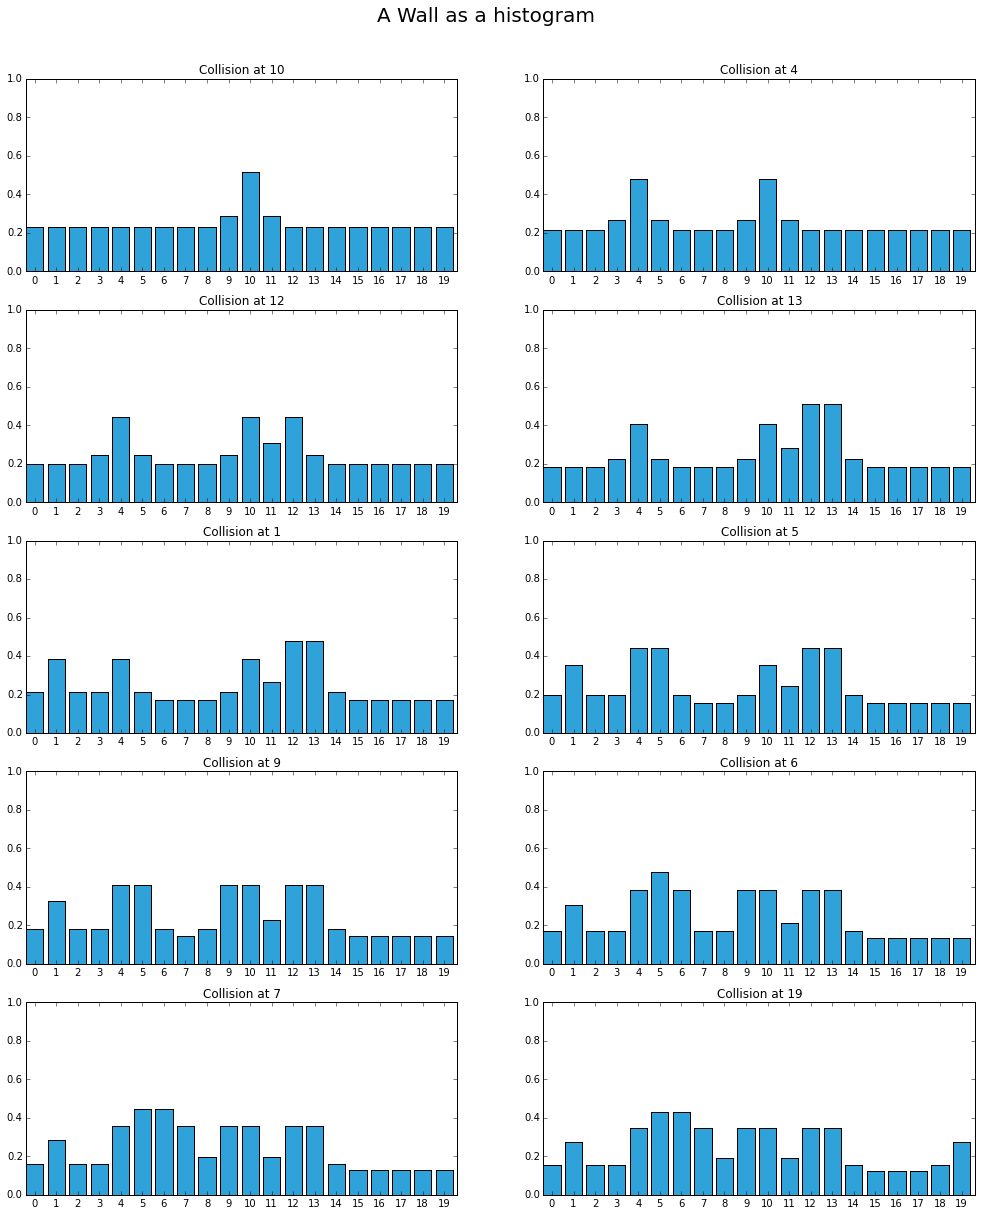

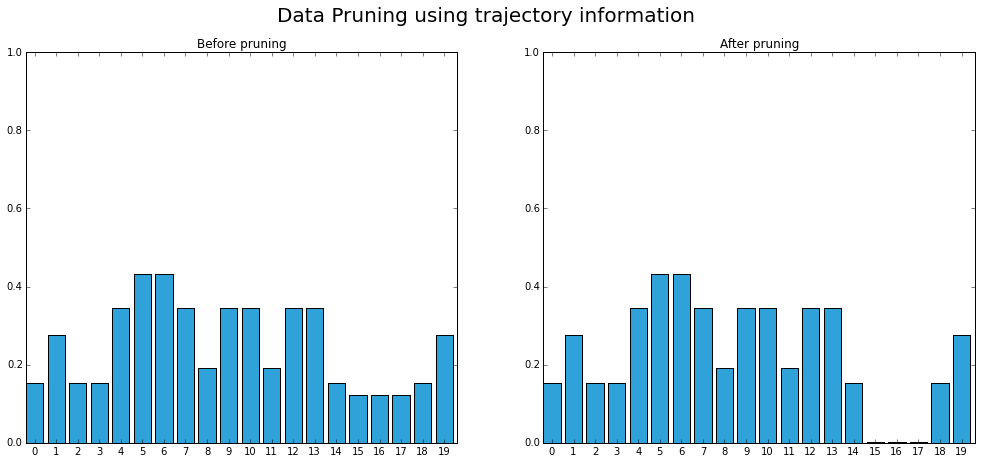

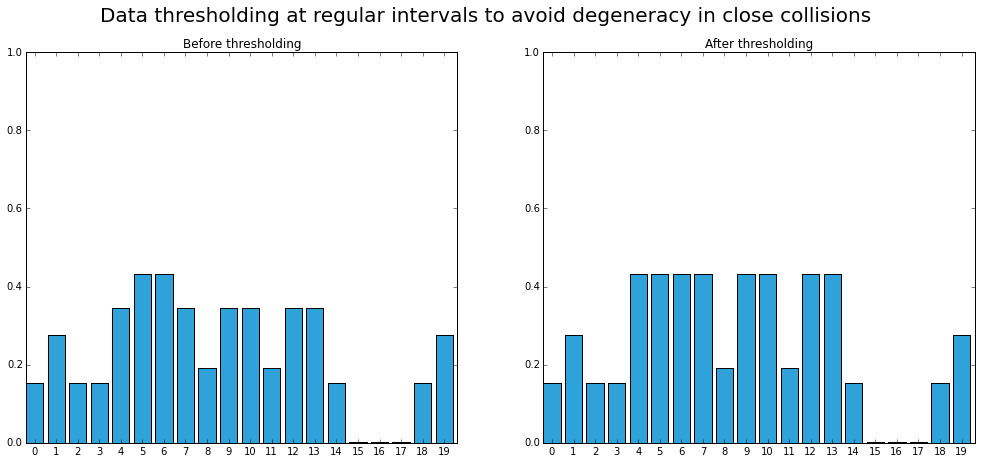

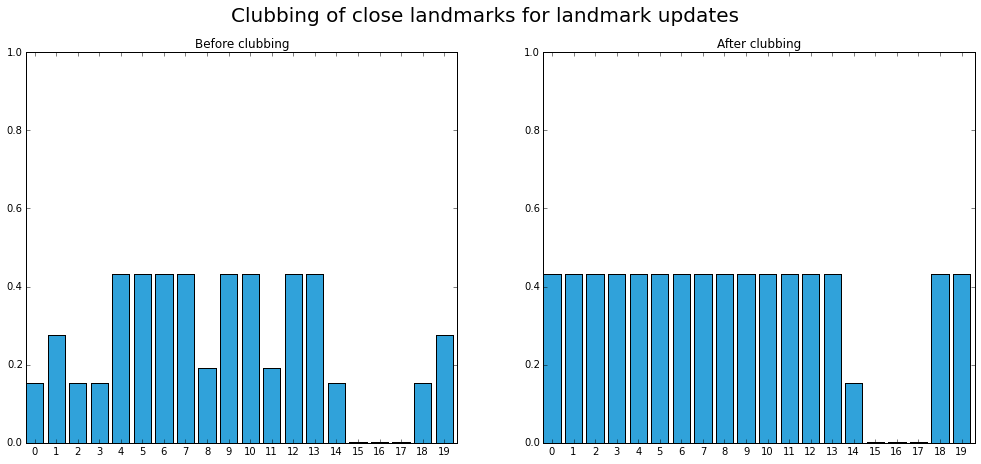

Final look of the wall in map


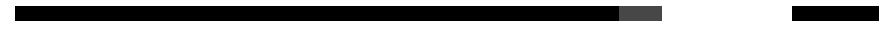

In [7]:
# Python code for histogram filter
%run ../../New_world/histogram_filter_wall_hypothesis.ipynb

## Conclusions

1. FastSLAM algorithm suitable for impact-based SLAM
2. Point landmarks are less suitable
3. Histogram distribution preferred for map representation

## Next workshop .....

- Incorporating histogram filter into the FastSLAM algorithm
- Modify the FastSLAM algorithm to accomodate these new changes
- Practical results 